### <font color=burgandy> Clustering Assignment by Chethan BR: chethanbr86@gmail.com

## <font color=orange> Importing all the Necessary Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [3]:
pd.set_option('display.max_columns',200)
pd.set_option('display.width',500)
pd.set_option('display.max_rows', 200)

## <font color=orange> Importing Data

In [4]:
help_NGO_df = pd.read_csv('Country-data.csv')
help_NGO_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## <font color=orange> Normal Routine Checks

In [5]:
help_NGO_df.shape

(167, 10)

In [6]:
def info_table(df):     
    # Sum of null values
    null_val = df.isnull().sum()
        
    # Percentage of missing values
    null_val_percent = 100 * df.isnull().sum() / len(df)
    
    # Data type 
    data_type = df.dtypes
    
    #unique values
    unique_val = df.nunique()
        
    # Make a table with the results
    null_val_table = pd.concat([null_val, null_val_percent,data_type, unique_val], axis=1)   
        
    # Rename the columns for clarity
    summary_table = null_val_table.rename(columns = {0 : 'Null Values', 1 : '% of Null Values', 2 : 'Data_Type', 3: 'Unique values'})
    return summary_table

In [7]:
info_table(help_NGO_df)

,Null Values,% of Null Values,Data_Type,Unique values
country,0,0.0,object,167
child_mort,0,0.0,float64,139
exports,0,0.0,float64,147
health,0,0.0,float64,147
imports,0,0.0,float64,151
income,0,0.0,int64,156
inflation,0,0.0,float64,156
life_expec,0,0.0,float64,127
total_fer,0,0.0,float64,138
gdpp,0,0.0,int64,157


#### <font color=green> As we can see there are no duplicates in column 'country' and no null values in whole dataset.

## <font color=orange> Coversion of columns from percentile to normal values

In [8]:
help_NGO_df['exports'] = help_NGO_df['exports']*help_NGO_df['gdpp']/100
help_NGO_df['health'] = help_NGO_df['health']*help_NGO_df['gdpp']/100
help_NGO_df['imports'] = help_NGO_df['imports']*help_NGO_df['gdpp']/100

In [9]:
help_NGO_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## <font color=orange> EDA

### <font color=orange> Univariate Analysis

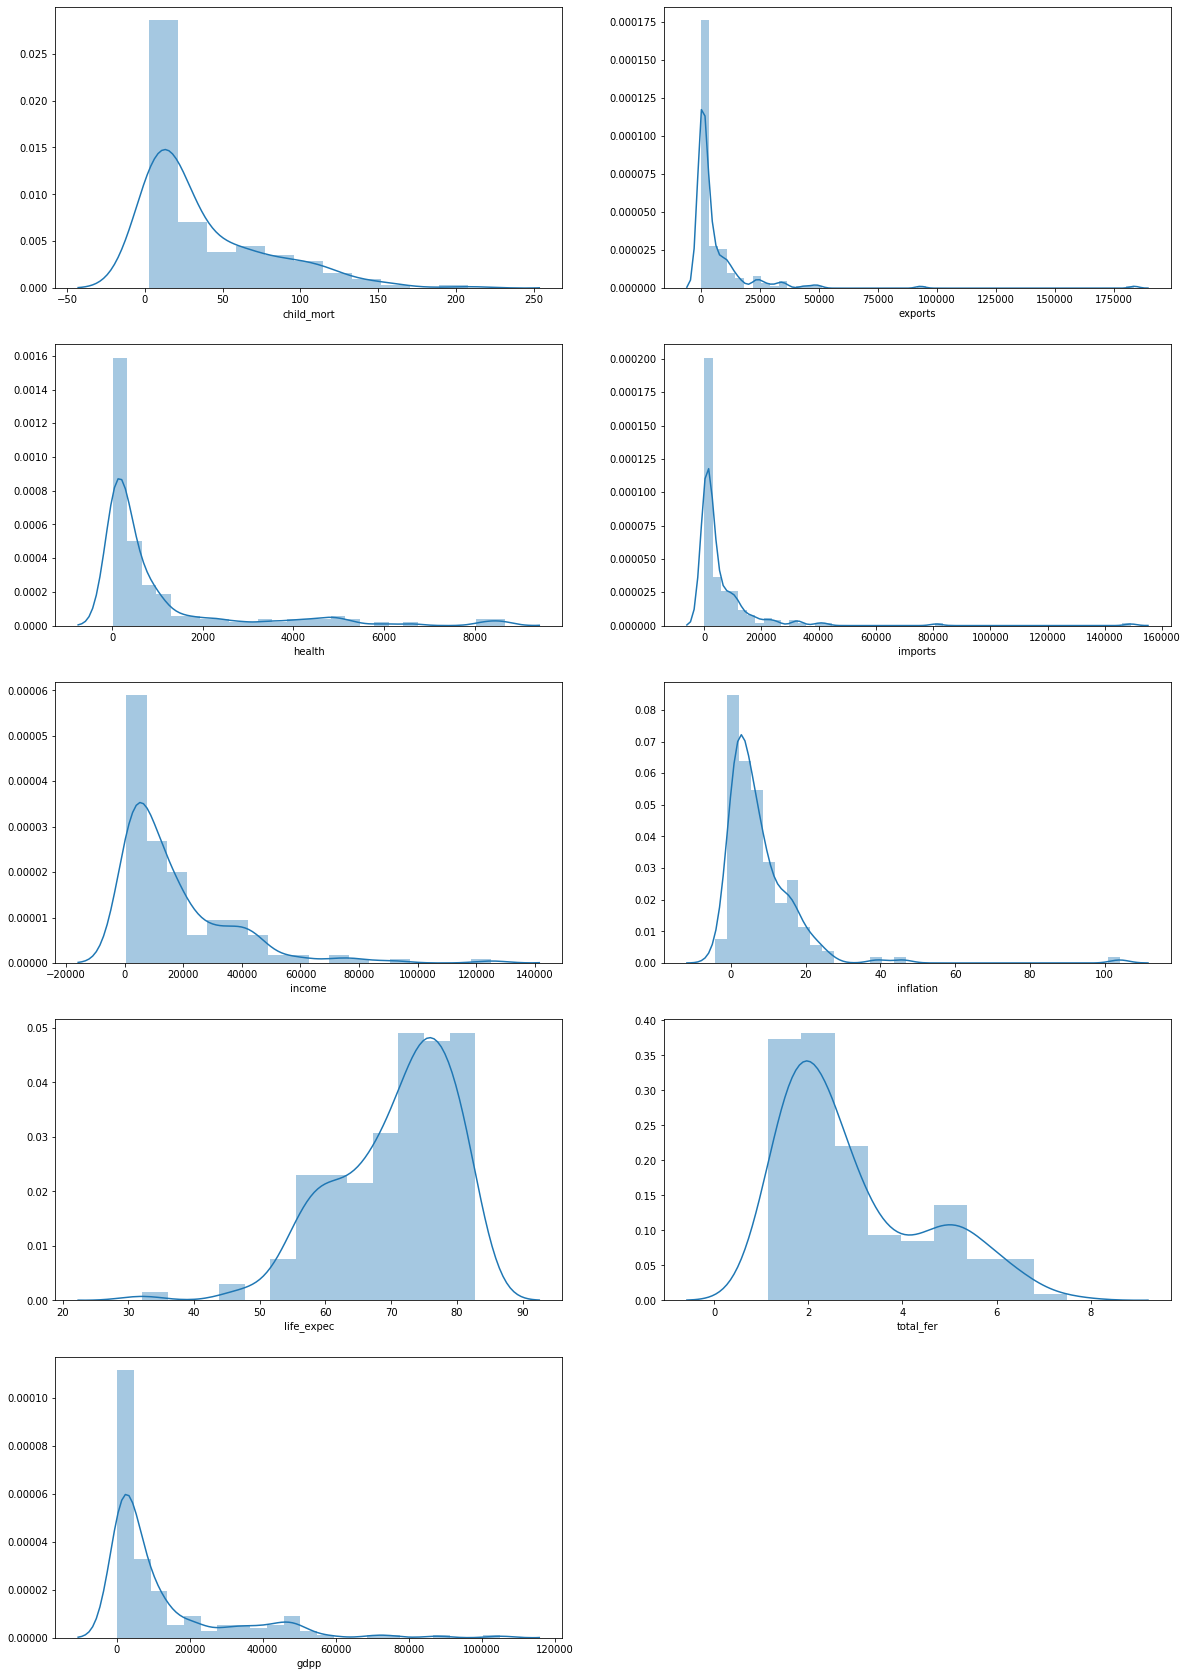

In [10]:
col_data = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

plt.figure(figsize=(20,30))
for i in enumerate(col_data):
    plt.subplot(5,2,i[0]+1)
    sns.distplot(help_NGO_df[i[1]])

#### <font color=green> As we can see here most of the column data like child_mort, exports, health, imports and inflation show a normal distribution meaning the values are clustered in a single range but some columns like income, life_expec, total_fer and gdpp have data points spread across like outliers.

### <font color=orange> Bivariate Analysis

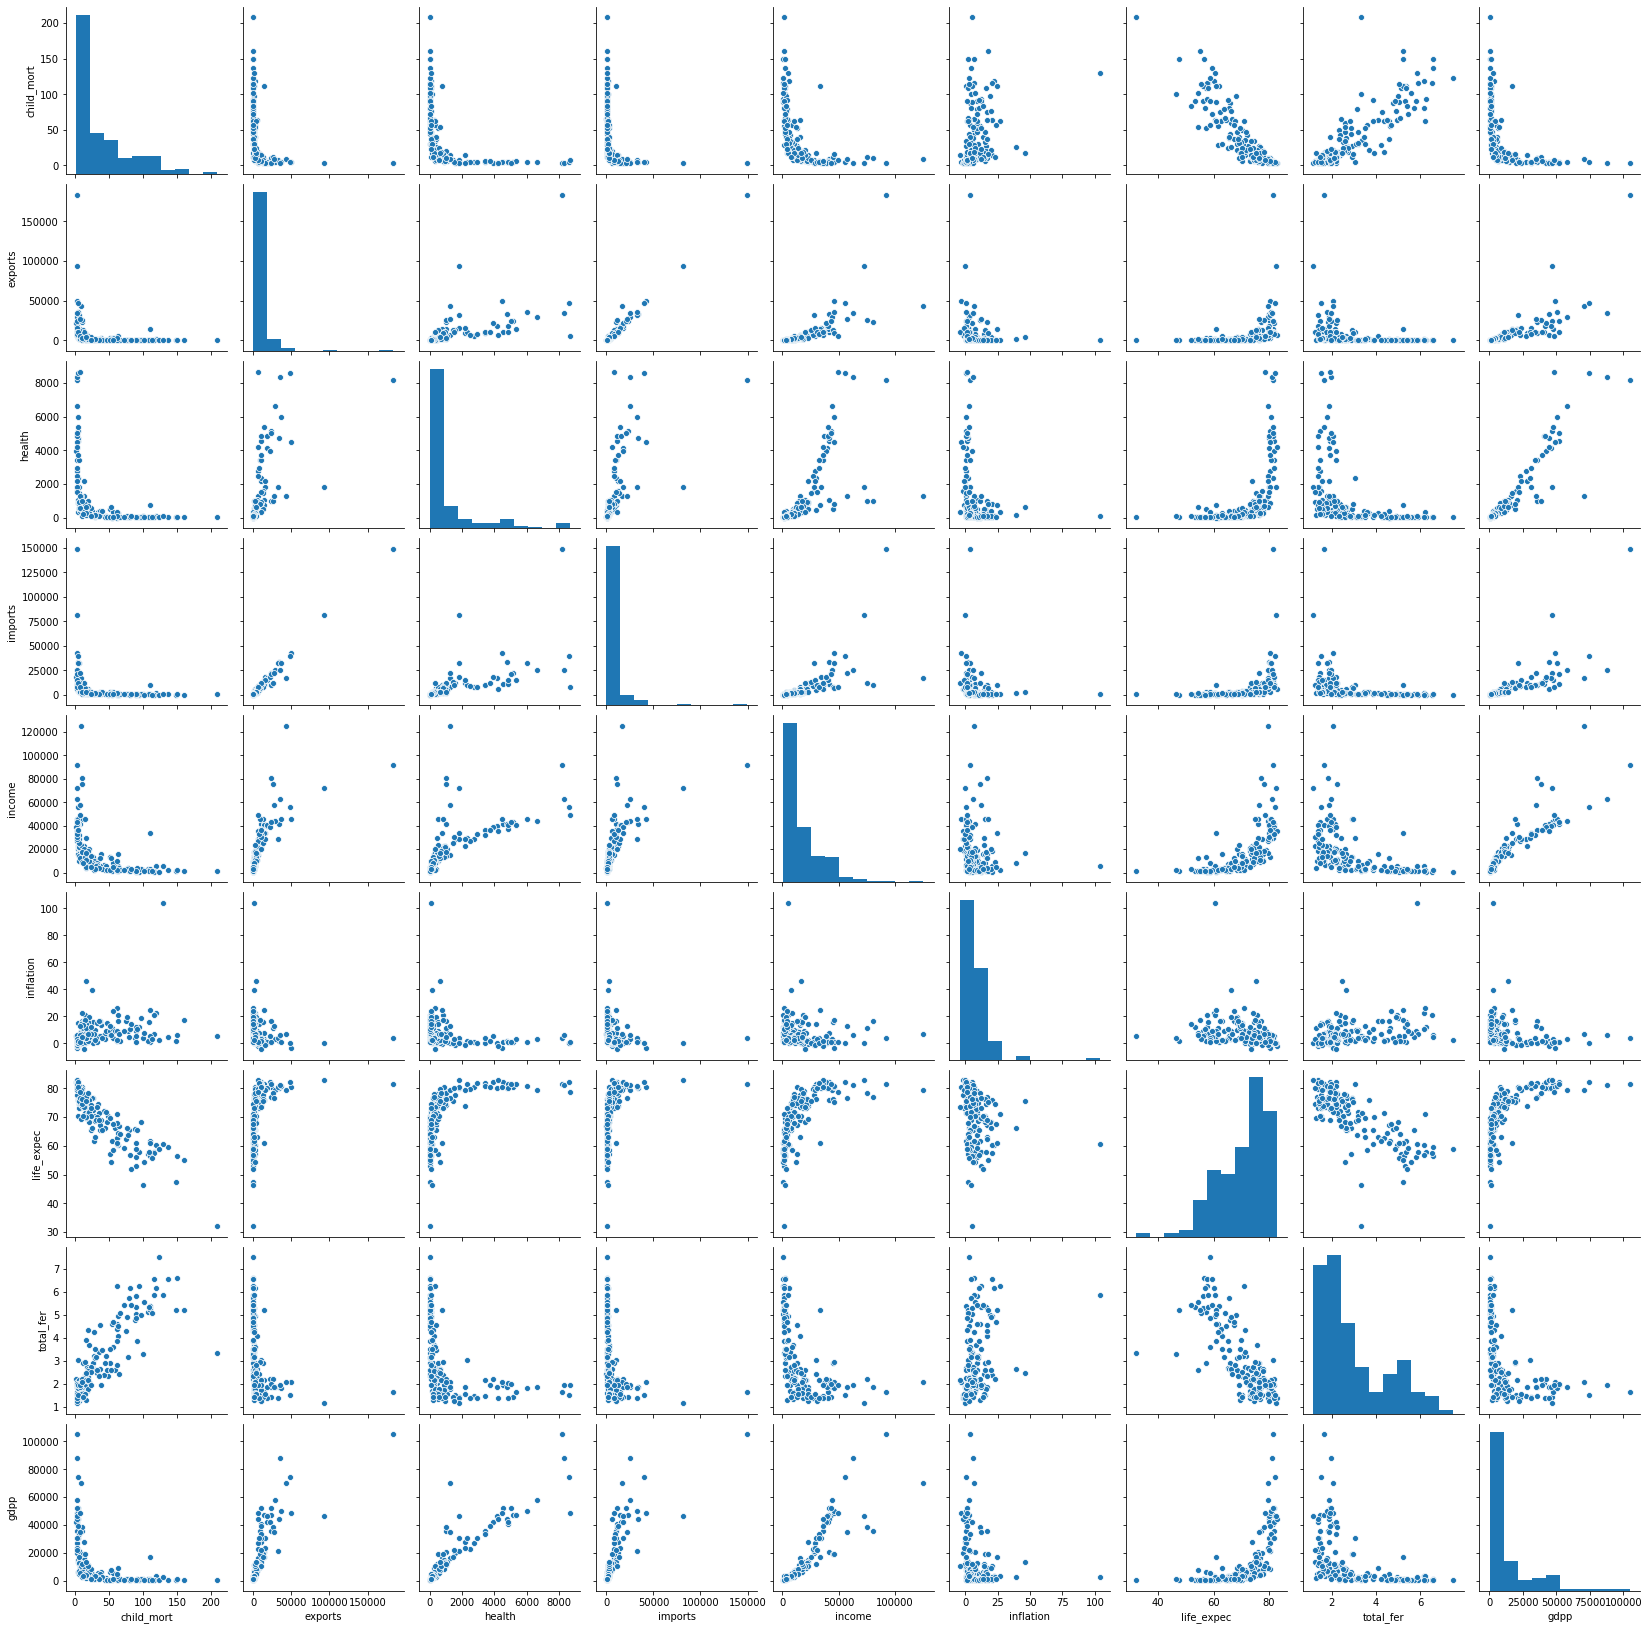

In [11]:
sns.pairplot(help_NGO_df)
plt.show()

#### <font color=green> We can see how some variables are linearly correlated and how some are inversly correlated with each other.

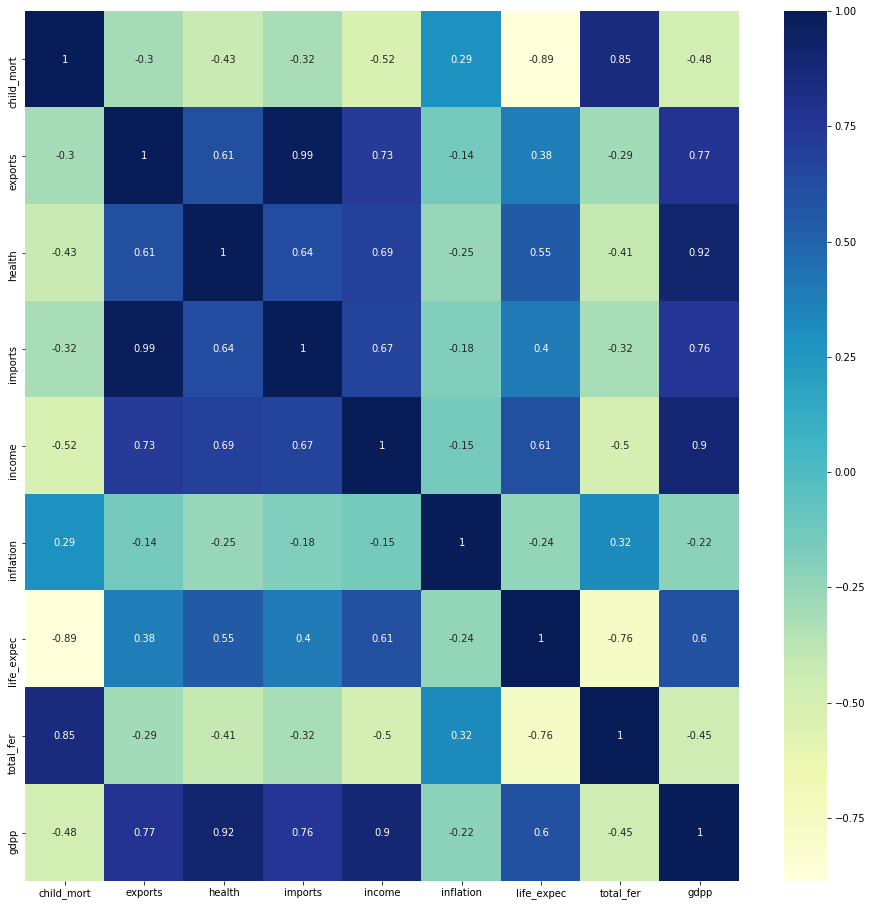

In [12]:
plt.figure(figsize = (16,16))  
sns.heatmap(help_NGO_df.corr(),annot = True,cmap="YlGnBu")

<font color=green> - child_mort has high negative correlation with life_expec <br>
<font color=green> - gdpp has high positive correlation with health, exports, imports and income<br>
<font color=green> - exports and imports are highly correlated<br>
<font color=green> - total_fer is highly positively correlated with child_mort and negatively correlated with life_expec

## <font color=orange> Finding outliers

In [13]:
help_NGO_df.child_mort.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    167.000000
mean      38.270060
std       40.328931
min        2.600000
25%        8.250000
50%       19.300000
75%       62.100000
90%      100.220000
95%      116.000000
99%      153.400000
max      208.000000
Name: child_mort, dtype: float64

In [14]:
help_NGO_df.exports.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count       167.000000
mean       7420.618847
std       17973.885795
min           1.076920
25%         447.140000
50%        1777.440000
75%        7278.000000
90%       17760.600000
95%       31385.100000
99%       64794.260000
max      183750.000000
Name: exports, dtype: float64

In [15]:
help_NGO_df.health.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count     167.000000
mean     1056.733204
std      1801.408906
min        12.821200
25%        78.535500
50%       321.886000
75%       976.940000
90%      3825.416000
95%      4966.701000
99%      8410.330400
max      8663.600000
Name: health, dtype: float64

In [16]:
help_NGO_df.imports.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count       167.000000
mean       6588.352108
std       14710.810418
min           0.651092
25%         640.215000
50%        2045.580000
75%        7719.600000
90%       15034.280000
95%       24241.560000
99%       55371.390000
max      149100.000000
Name: imports, dtype: float64

In [17]:
help_NGO_df.income.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count       167.000000
mean      17144.688623
std       19278.067698
min         609.000000
25%        3355.000000
50%        9960.000000
75%       22800.000000
90%       41220.000000
95%       48290.000000
99%       84374.000000
max      125000.000000
Name: income, dtype: float64

In [18]:
help_NGO_df.inflation.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    167.000000
mean       7.781832
std       10.570704
min       -4.210000
25%        1.810000
50%        5.390000
75%       10.750000
90%       16.640000
95%       20.870000
99%       41.478000
max      104.000000
Name: inflation, dtype: float64

In [19]:
help_NGO_df.life_expec.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    167.000000
mean      70.555689
std        8.893172
min       32.100000
25%       65.300000
50%       73.100000
75%       76.800000
90%       80.400000
95%       81.400000
99%       82.370000
max       82.800000
Name: life_expec, dtype: float64

In [20]:
help_NGO_df.total_fer.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    167.000000
mean       2.947964
std        1.513848
min        1.150000
25%        1.795000
50%        2.410000
75%        3.880000
90%        5.322000
95%        5.861000
99%        6.563600
max        7.490000
Name: total_fer, dtype: float64

In [21]:
help_NGO_df.gdpp.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count       167.000000
mean      12964.155689
std       18328.704809
min         231.000000
25%        1330.000000
50%        4660.000000
75%       14050.000000
90%       41840.000000
95%       48610.000000
99%       79088.000000
max      105000.000000
Name: gdpp, dtype: float64

#### <font color=green> We can see that there are outliers present in the dataset.

### <font color=orange> Visualization of Outliers

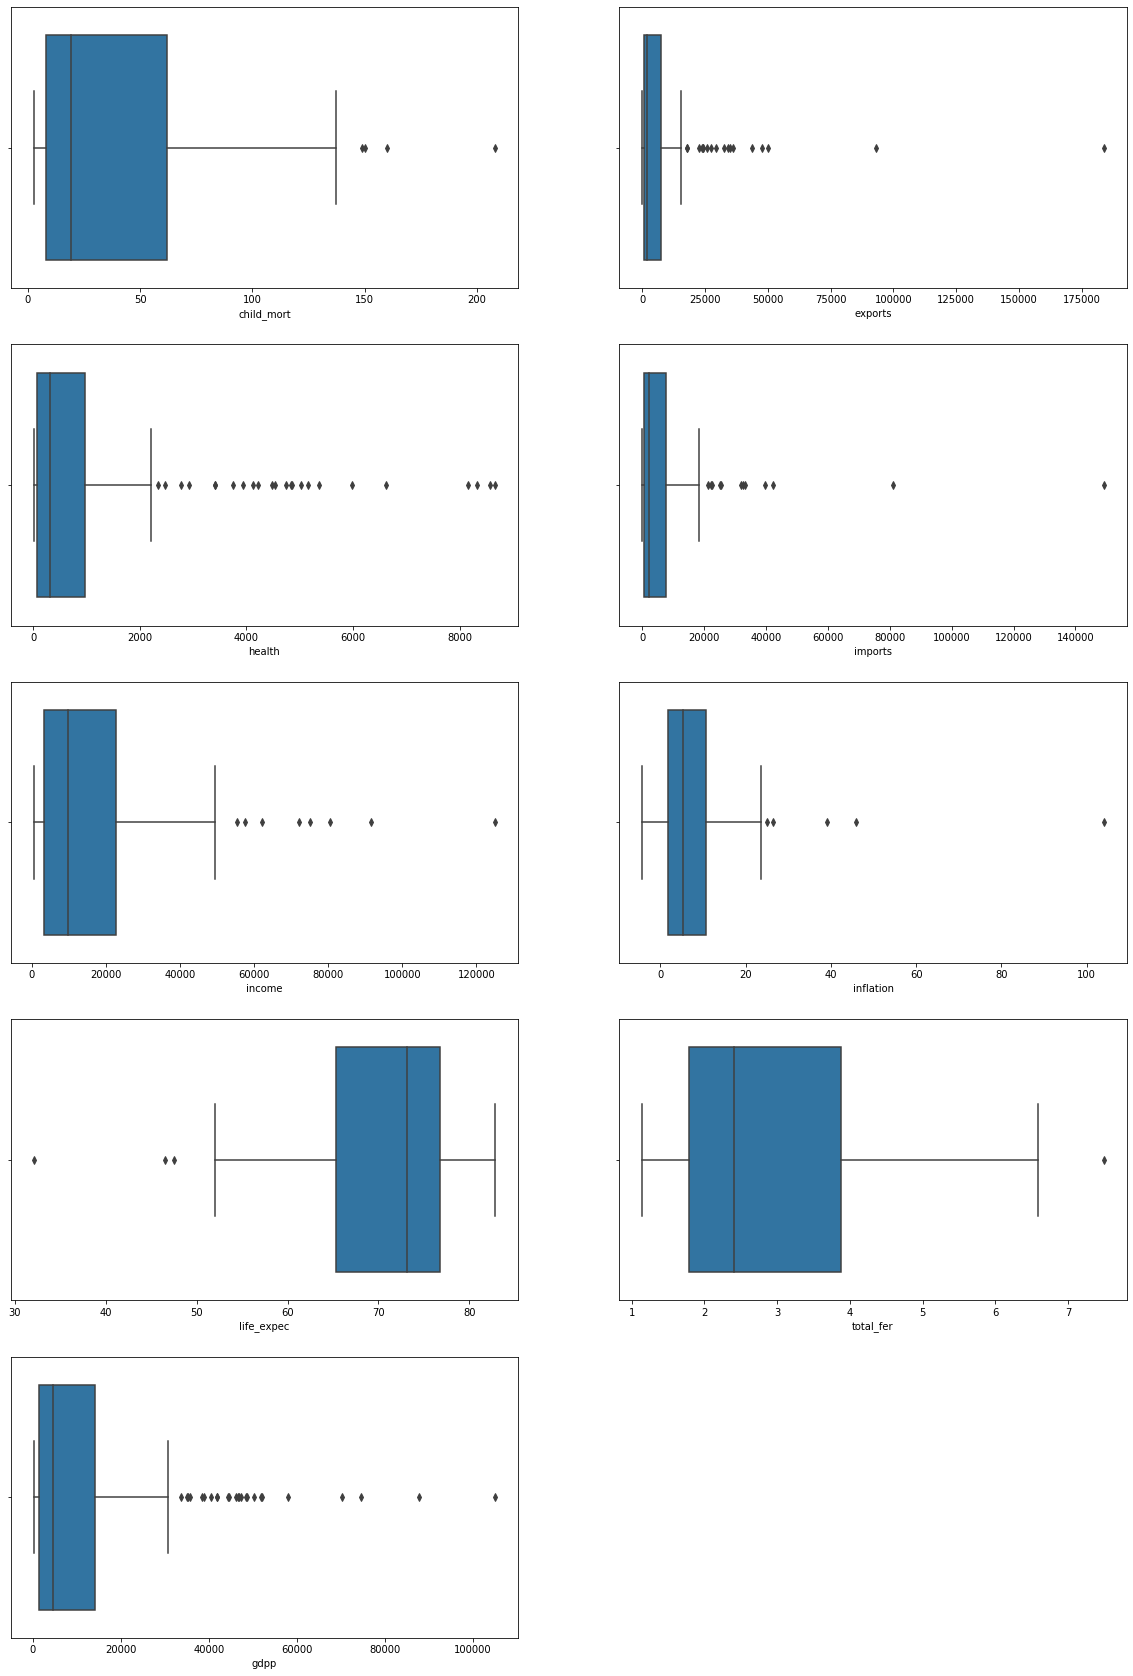

In [22]:
col_data = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

plt.figure(figsize=(20,30))
for i in enumerate(col_data):
    plt.subplot(5,2,i[0]+1)
    sns.boxplot(help_NGO_df[i[1]])

#### <font color=green> Apparently there are outliers in all columns which are to be treated by Capping.

## <font color=orange>  Outlier treatment: Capping the Outliers

In [23]:
q1 = help_NGO_df['child_mort'].quantile(0.01)
q4 = help_NGO_df['child_mort'].quantile(0.99)

help_NGO_df['child_mort'][help_NGO_df['child_mort']<=q1]=q1
help_NGO_df['child_mort'][help_NGO_df['child_mort']>=q4]=q4

#### <font color=green> The upper and lower quantiles have been set equally since higher values matter.

In [24]:
q1 = help_NGO_df['exports'].quantile(0.01)
q4 = help_NGO_df['exports'].quantile(0.9)

help_NGO_df['exports'][help_NGO_df['exports']<=q1]=q1
help_NGO_df['exports'][help_NGO_df['exports']>=q4]=q4

#### <font color=green> The imbalance is to get rid of outliers at upper qantile but lower quantile values matter.

In [25]:
q1 = help_NGO_df['health'].quantile(0.01)
q4 = help_NGO_df['health'].quantile(0.85)

help_NGO_df['health'][help_NGO_df['health']<=q1]=q1
help_NGO_df['health'][help_NGO_df['health']>=q4]=q4

#### <font color=green> The imbalance is to get rid of outliers at upper quantile but lower quantile values matter.

In [26]:
q1 = help_NGO_df['imports'].quantile(0.01)
q4 = help_NGO_df['imports'].quantile(0.9)

help_NGO_df['imports'][help_NGO_df['imports']<=q1]=q1
help_NGO_df['imports'][help_NGO_df['imports']>=q4]=q4

#### <font color=green> The imbalance is to get rid of outliers at upper qantile but lower quantile values matter.

In [27]:
q1 = help_NGO_df['income'].quantile(0.01)
q4 = help_NGO_df['income'].quantile(0.95)

help_NGO_df['income'][help_NGO_df['income']<=q1]=q1
help_NGO_df['income'][help_NGO_df['income']>=q4]=q4

#### <font color=green> The imbalance is to get rid of outliers at upper qantile but lower quantile values matter.

In [28]:
q1 = help_NGO_df['inflation'].quantile(0.01)
q4 = help_NGO_df['inflation'].quantile(0.95)

help_NGO_df['inflation'][help_NGO_df['inflation']<=q1]=q1
help_NGO_df['inflation'][help_NGO_df['inflation']>=q4]=q4

#### <font color=green> The imbalance is to get rid of outliers at upper qantile but lower quantile values matter.

In [29]:
q1 = help_NGO_df['life_expec'].quantile(0.1)
q4 = help_NGO_df['life_expec'].quantile(0.99)

help_NGO_df['life_expec'][help_NGO_df['life_expec']<=q1]=q1
help_NGO_df['life_expec'][help_NGO_df['life_expec']>=q4]=q4

#### <font color=green> The imbalance is to get rid of outliers at lower qantile but upper quantile values matter.

In [30]:
q1 = help_NGO_df['total_fer'].quantile(0.01)
q4 = help_NGO_df['total_fer'].quantile(0.99)

help_NGO_df['total_fer'][help_NGO_df['total_fer']<=q1]=q1
help_NGO_df['total_fer'][help_NGO_df['total_fer']>=q4]=q4

#### <font color=green> The upper and lower quantiles have been set equally.

In [31]:
q1 = help_NGO_df['gdpp'].quantile(0.01)
q4 = help_NGO_df['gdpp'].quantile(0.85)

help_NGO_df['gdpp'][help_NGO_df['gdpp']<=q1]=q1
help_NGO_df['gdpp'][help_NGO_df['gdpp']>=q4]=q4

#### <font color=green> The imbalance is to get rid of outliers at upper qantile but lower quantile values matter.

### <font color=orange> Visualizing after Capping the outliers

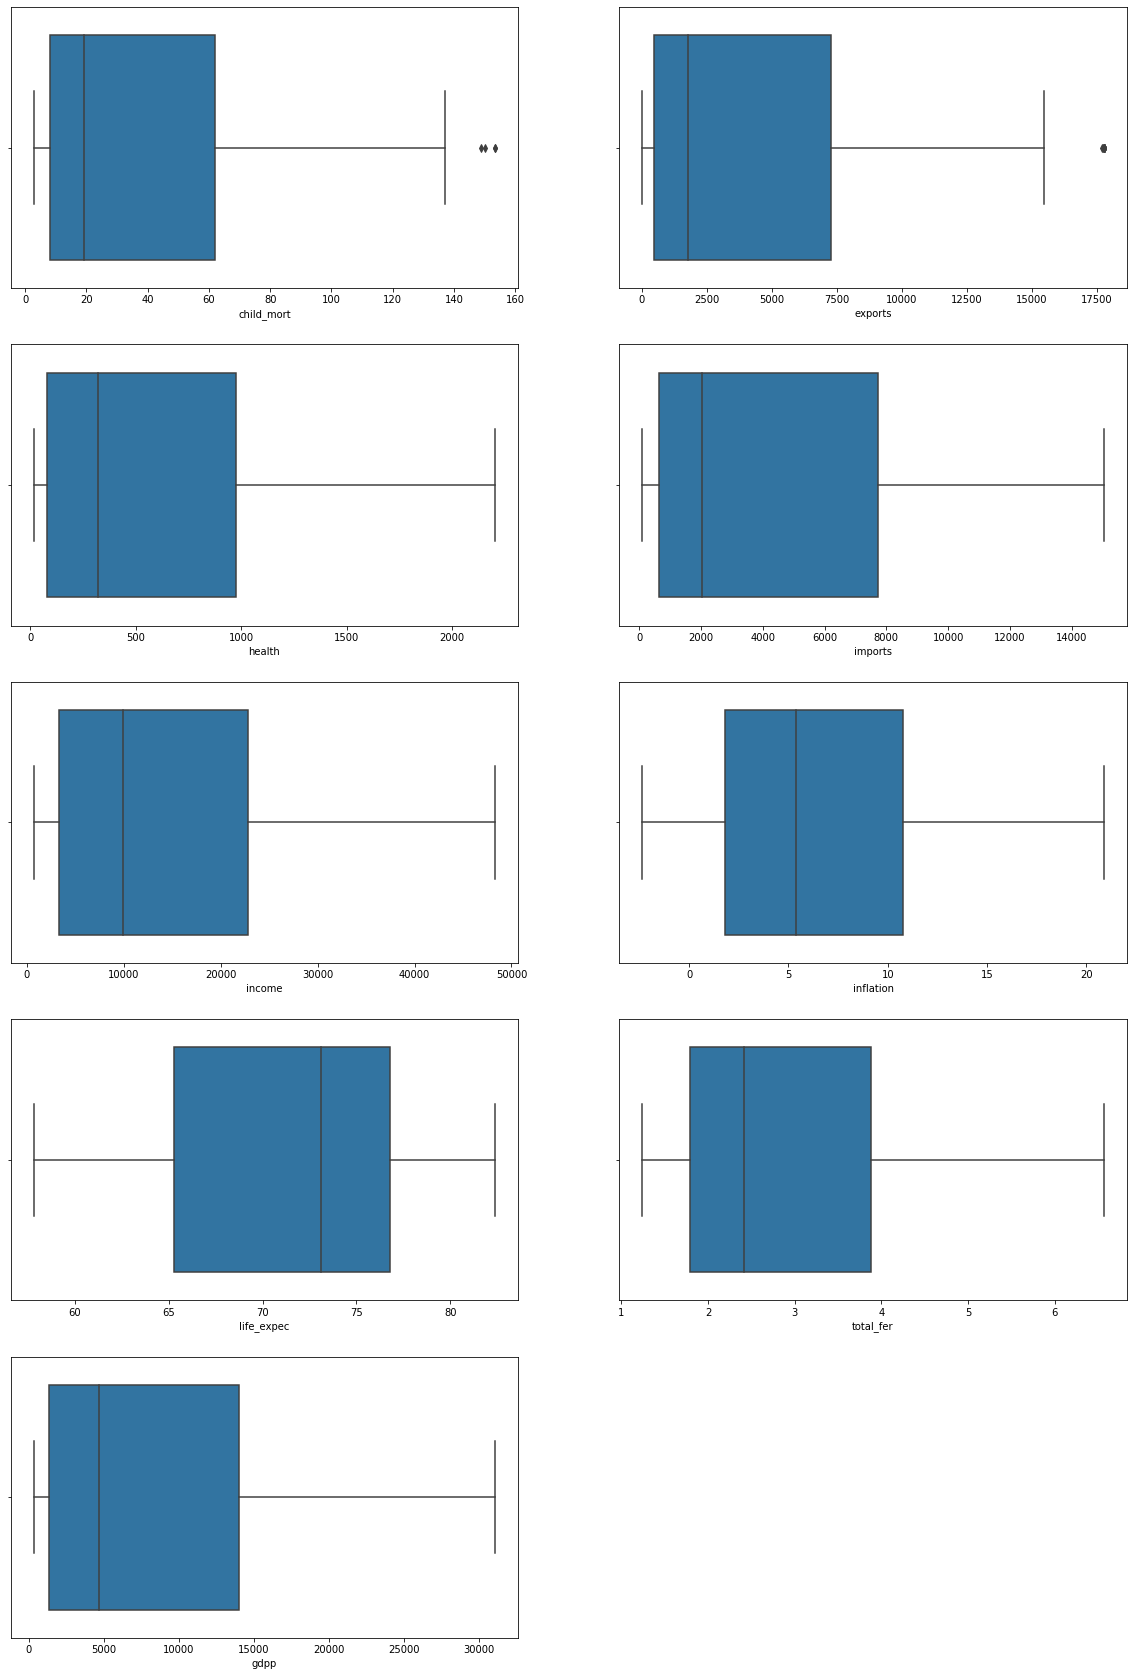

In [32]:
plt.figure(figsize=(20,30))
for i in enumerate(col_data):
    plt.subplot(5,2,i[0]+1)
    sns.boxplot(help_NGO_df[i[1]])

### <font color=green> As we have got rid of outliers by capping, we can proceed to next step.

## <font color=orange> Clustering the Data

In [33]:
df1 = help_NGO_df.copy()

In [34]:
df1.drop('country', axis=1, inplace=True)
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610.0,9.44,57.82,5.82,553.0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.30,1.65,4090.0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.50,2.89,4460.0
3,119.0,2199.19,100.6050,1514.370,5900.0,20.87,60.10,6.16,3530.0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.80,2.13,12200.0


## <font color=orange> Scaling for k-means

In [35]:
scale = StandardScaler()
df1 = scale.fit_transform(df1)
df1 = pd.DataFrame(df1)
df1.columns = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344012,-0.797324,-0.809703,-0.841745,-0.958490,0.393469,-1.694736,1.926928,-0.864346
1,-0.547543,-0.611671,-0.514964,-0.494027,-0.394106,-0.387374,0.679359,-0.865911,-0.542317
2,-0.272548,-0.515013,-0.621802,-0.611429,-0.192637,1.444058,0.705053,-0.035427,-0.508630
3,2.084186,-0.432134,-0.733158,-0.588655,-0.667480,2.196506,-1.401828,2.154642,-0.593302
4,-0.709457,0.138812,0.095134,0.545073,0.227937,-0.868499,0.743593,-0.544433,0.196065


## <font color=orange> Hopkins Score calculation for k-means

In [36]:
## Hopkins Score

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [37]:
hopkins(df1)

0.7914310278581138

## <font color=orange> Kmeans Clustering

### <font color=orange> Silhouette method

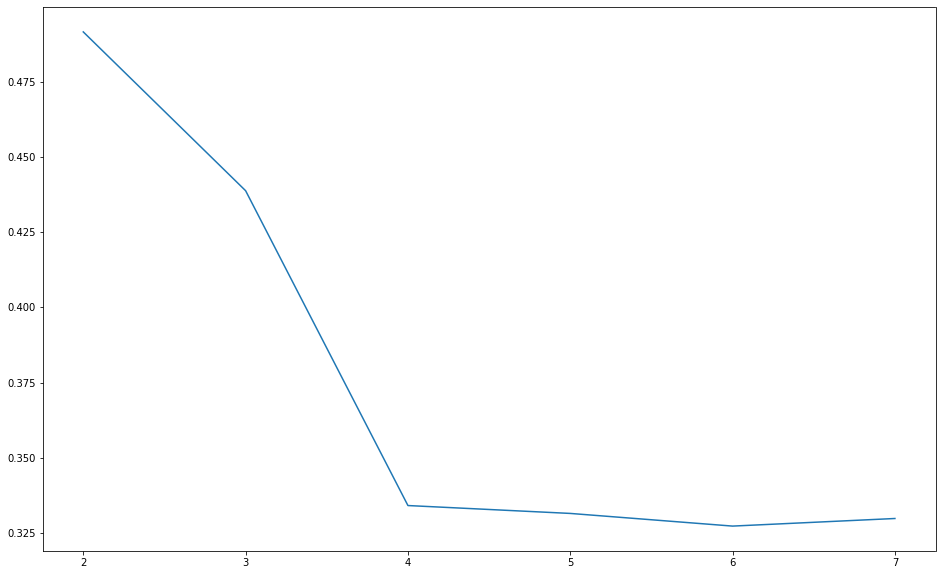

In [38]:
ss_score = []
for k in range(2, 8):
    kmeans_1 = KMeans(n_clusters = k, max_iter = 100, init = 'k-means++', random_state = k).fit(df1)
    ss_score.append([k, silhouette_score(df1, kmeans_1.labels_)])

plt.figure(figsize=(16,10))
plt.plot(pd.DataFrame(ss_score)[0], pd.DataFrame(ss_score)[1])
plt.show()

#### <font color=green> Here we can consider either 3 or 4 cluster points as per the graph.

In [39]:
ss_score

[[2, 0.49148540737403407],
 [3, 0.43872568524951844],
 [4, 0.33411961325117584],
 [5, 0.3314991234339518],
 [6, 0.3272918467074516],
 [7, 0.3298148597840667]]

#### <font color=green> 3 cluster points seems resonable according to SS Score.

In [40]:
kmeans_1.labels_

array([2, 4, 0, 6, 3, 0, 4, 1, 1, 0, 1, 5, 4, 3, 0, 1, 4, 2, 4, 4, 3, 4,
       3, 5, 3, 2, 6, 4, 2, 1, 4, 2, 2, 3, 4, 4, 2, 6, 6, 3, 2, 3, 1, 1,
       1, 4, 4, 4, 4, 5, 6, 3, 4, 1, 1, 6, 2, 4, 1, 6, 1, 3, 4, 6, 2, 4,
       2, 3, 1, 4, 0, 0, 6, 1, 1, 1, 4, 1, 4, 0, 2, 2, 5, 4, 2, 3, 3, 2,
       2, 5, 3, 1, 3, 2, 6, 3, 3, 2, 1, 6, 3, 4, 0, 0, 3, 4, 2, 4, 2, 0,
       1, 1, 2, 6, 1, 5, 2, 3, 4, 4, 4, 3, 1, 1, 3, 0, 2, 4, 5, 2, 3, 3,
       6, 1, 1, 1, 4, 4, 1, 1, 0, 4, 6, 4, 1, 1, 4, 2, 3, 6, 2, 4, 4, 3,
       4, 2, 0, 5, 1, 1, 3, 0, 4, 0, 0, 6, 6])

In [41]:
kmeans_1

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=7, tol=0.0001, verbose=0)

### <font color=orange> Elbow curve method

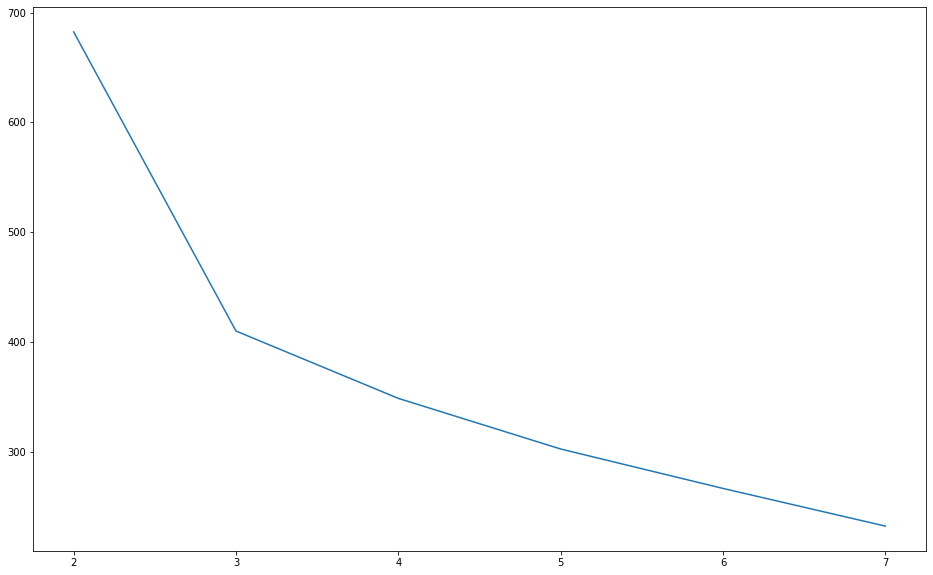

In [42]:
elb_crv = []
for k in range(2, 8):
    kmeans_2 = KMeans(n_clusters = k, max_iter = 100, init = 'k-means++', random_state = k).fit(df1)
    elb_crv.append([k, kmeans_2.inertia_])
    
plt.figure(figsize=(16,10))
plt.plot(pd.DataFrame(elb_crv)[0], pd.DataFrame(elb_crv)[1])
plt.show()

#### <font color=green> According to elbow curve, again 3 cluster points seems good for analysis.

In [43]:
elb_crv

[[2, 682.5331132704621],
 [3, 409.937281894804],
 [4, 348.56678969675033],
 [5, 302.42948018467615],
 [6, 266.49689781890527],
 [7, 232.18167767383187]]

In [44]:
kmeans_2.labels_

array([2, 4, 0, 6, 3, 0, 4, 1, 1, 0, 1, 5, 4, 3, 0, 1, 4, 2, 4, 4, 3, 4,
       3, 5, 3, 2, 6, 4, 2, 1, 4, 2, 2, 3, 4, 4, 2, 6, 6, 3, 2, 3, 1, 1,
       1, 4, 4, 4, 4, 5, 6, 3, 4, 1, 1, 6, 2, 4, 1, 6, 1, 3, 4, 6, 2, 4,
       2, 3, 1, 4, 0, 0, 6, 1, 1, 1, 4, 1, 4, 0, 2, 2, 5, 4, 2, 3, 3, 2,
       2, 5, 3, 1, 3, 2, 6, 3, 3, 2, 1, 6, 3, 4, 0, 0, 3, 4, 2, 4, 2, 0,
       1, 1, 2, 6, 1, 5, 2, 3, 4, 4, 4, 3, 1, 1, 3, 0, 2, 4, 5, 2, 3, 3,
       6, 1, 1, 1, 4, 4, 1, 1, 0, 4, 6, 4, 1, 1, 4, 2, 3, 6, 2, 4, 4, 3,
       4, 2, 0, 5, 1, 1, 3, 0, 4, 0, 0, 6, 6])

In [45]:
kmeans_2

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=7, tol=0.0001, verbose=0)

#### <font color=green> By above two methods we can see that k can be taken as 3.

In [46]:
kmeans = KMeans(n_clusters = 3, max_iter = 300, init = 'k-means++', random_state = 3)
kmeans.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=3, tol=0.0001, verbose=0)

In [47]:
kmeans.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 2, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 0, 1, 1,
       0, 2, 2, 2, 0, 1, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [48]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=3, tol=0.0001, verbose=0)

In [49]:
help_NGO_df['labels_kmeans'] = kmeans.labels_
help_NGO_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels_kmeans
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,57.82,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.30,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.50,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,20.87,60.10,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.80,2.13,12200.0,1


#### <font color=orange> Renaming the cluster labels

In [50]:
help_NGO_df.labels_kmeans.replace([0,1,2], ['Under-Developed','Developing','Developed'], inplace=True)
help_NGO_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels_kmeans
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,57.82,5.82,553.0,Under-Developed
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.30,1.65,4090.0,Developing
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.50,2.89,4460.0,Developing
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,20.87,60.10,6.16,3530.0,Under-Developed
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.80,2.13,12200.0,Developing


In [51]:
help_NGO_df.labels_kmeans.value_counts()

Developing         80
Under-Developed    46
Developed          41
Name: labels_kmeans, dtype: int64

#### <font color=green> We can clearly see how the clusters points are poised which seems reasonable.

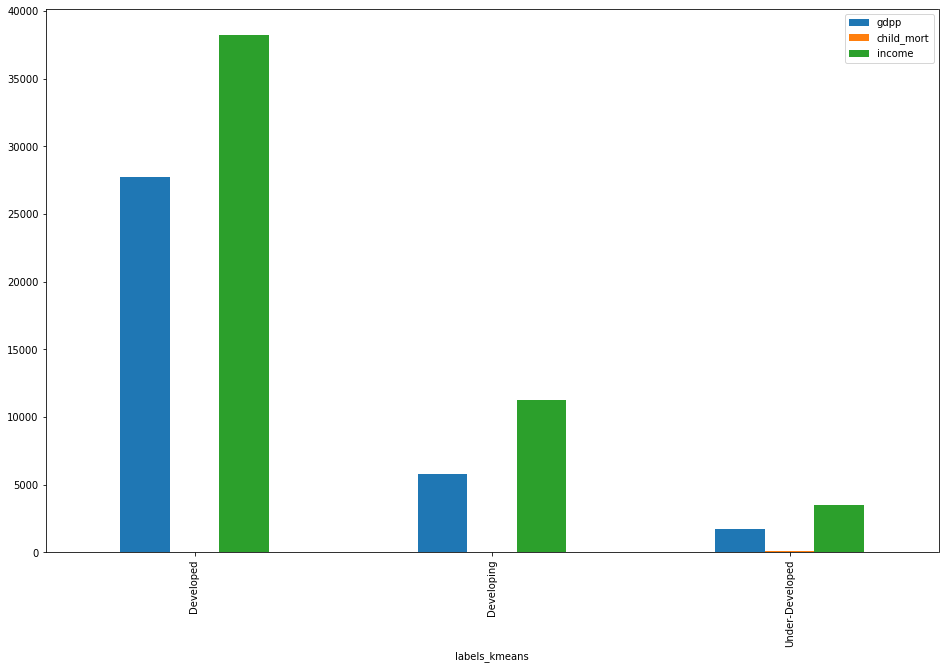

In [52]:
help_NGO_df[['gdpp', 'child_mort', 'income', 'labels_kmeans']].groupby("labels_kmeans").mean().plot(kind = 'bar', figsize=(16,10))
plt.show()

#### <font color=green> Here according to graph, we can see how developed, under-developed and developing countries are stacked against each other.

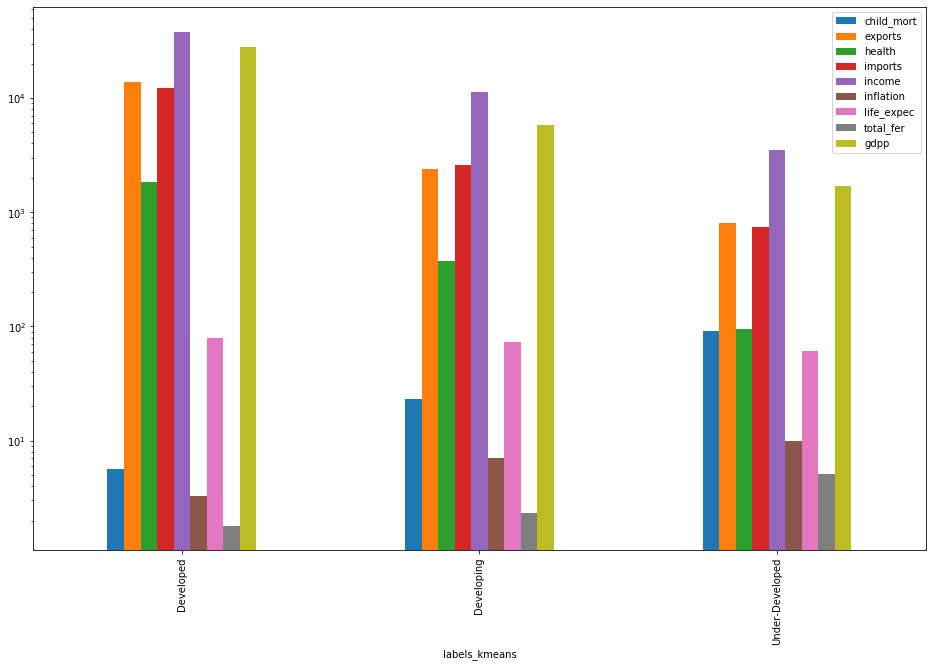

In [53]:
#plt.figure(figsize=(16,10))
help_NGO_df[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec',  'total_fer', 'gdpp', 'labels_kmeans']].groupby("labels_kmeans").mean().plot(kind = 'bar', figsize=(16,10))
plt.yscale('log')
plt.show()

#### <font color=green> Stacking all variables against 3 clusters.

### <font color=orange> Sorting by columns 'gdpp', 'child_mort', 'income' to see which country needs help

In [54]:
help_NGO_df[help_NGO_df['labels_kmeans']=='Under-Developed'].sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels_kmeans
26,Burundi,93.6,22.243716,26.7960,104.90964,764.00,12.30,57.82,6.2600,331.62,Under-Developed
88,Liberia,89.3,62.457000,38.5860,302.80200,742.24,5.47,60.80,5.0200,331.62,Under-Developed
37,"Congo, Dem. Rep.",116.0,137.274000,26.4194,165.66400,742.24,20.80,57.82,6.5400,334.00,Under-Developed
112,Niger,123.0,77.256000,17.9568,170.86800,814.00,2.55,58.80,6.5636,348.00,Under-Developed
132,Sierra Leone,153.4,67.032000,52.2690,137.65500,1220.00,17.20,57.82,5.2000,399.00,Under-Developed


### <font color=green> We can clearly see the top 5 under-developed countries which need aid due to low income, gdpp, health and high child mortality.

In [55]:
help_NGO_df[help_NGO_df['labels_kmeans']=='Developing'].sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels_kmeans
109,Nepal,47.0,56.7136,31.0800,215.488,1990.0,15.10,68.3,2.61,592.0,Developing
146,Tajikistan,52.4,109.9620,44.1324,432.468,2110.0,12.50,69.6,3.51,738.0,Developing
12,Bangladesh,49.4,121.2800,26.6816,165.244,2440.0,7.14,70.4,2.33,758.0,Developing
27,Cambodia,44.4,425.2260,44.6448,467.670,2520.0,3.12,66.1,2.88,786.0,Developing
83,Kyrgyz Republic,29.6,454.0800,54.3840,718.960,2790.0,10.00,68.5,3.10,880.0,Developing


In [56]:
help_NGO_df[help_NGO_df['labels_kmeans']=='Developed'].sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels_kmeans
67,Hungary,6.0,10715.8,960.23,10021.5,22300.0,2.330,74.5,1.25,13100.0,Developed
51,Estonia,4.5,10964.6,880.38,10030.2,22700.0,1.740,76.0,1.72,14600.0,Developed
134,Slovak Republic,7.0,12665.8,1459.14,12914.8,25200.0,0.485,75.5,1.43,16600.0,Developed
128,Saudi Arabia,15.7,9572.8,827.97,6369.0,45400.0,17.200,75.1,2.96,19300.0,Developed
115,Oman,11.7,12680.1,534.61,7951.6,45300.0,15.600,76.1,2.90,19300.0,Developed


### <font color=orange> Visualizing the k-means clustering

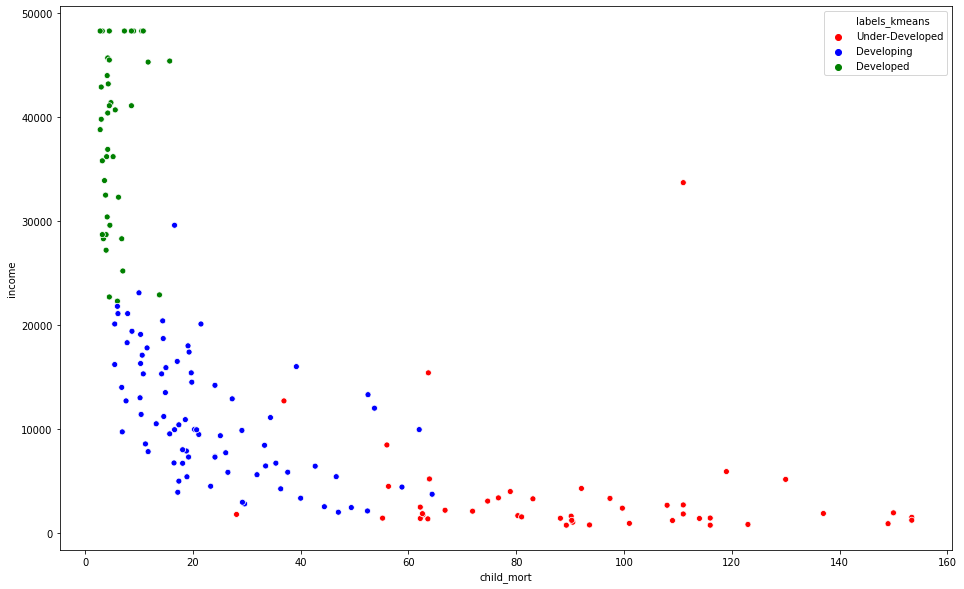

In [57]:
plt.figure(figsize=(16,10))
sns.scatterplot(x = "child_mort" , y = "income", hue = 'labels_kmeans', data = help_NGO_df, palette=['red','blue','green'])
plt.show()

#### <font color=green> Here we can clearly see that how low income leads to lot of problems like health and child mortality.

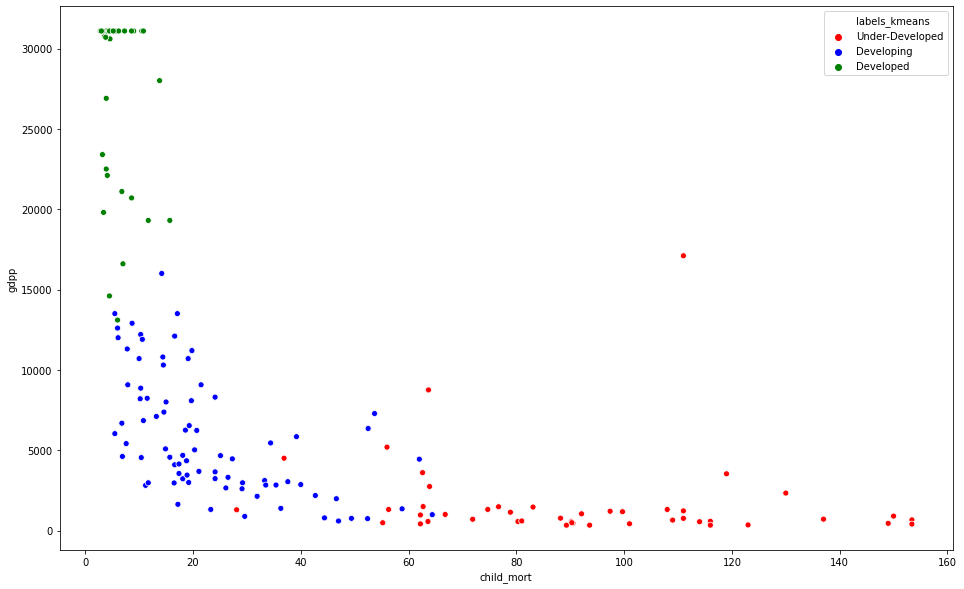

In [58]:
plt.figure(figsize=(16,10))
sns.scatterplot(x = "child_mort" , y = "gdpp", hue = 'labels_kmeans', data = help_NGO_df, palette=['red','blue','green'])
plt.show()

#### <font color=green> Here we can clearly see that how low gdpp leads to lot of problems like health and child mortality.

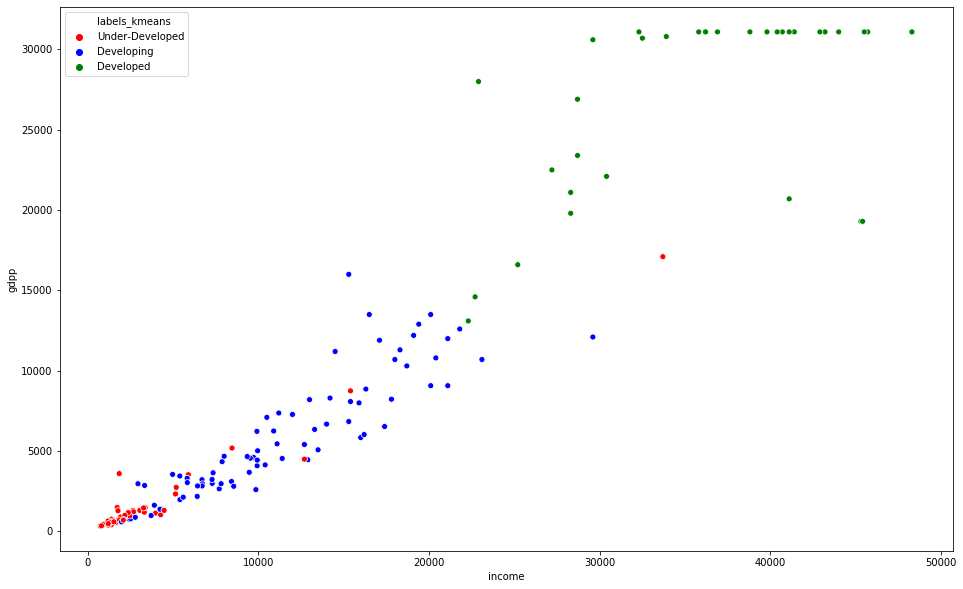

In [59]:
plt.figure(figsize=(16,10))
sns.scatterplot(x = "income" , y = "gdpp", hue = 'labels_kmeans', data = help_NGO_df, palette=['red','blue','green'])
plt.show()

#### <font color=green> Here we can clearly see that how income and gdpp are linealy related to each other. Higher the income, higher is the GDP and vice-versa.

### <font color=orange> Calculating mean of the required columns for comparison

In [60]:
kmean_df = help_NGO_df.copy()
kmean_df = kmean_df.groupby('labels_kmeans')['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp'].mean()
kmean_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
labels_kmeans,,,,,,,,,
Developed,5.656098,13754.409756,1856.810976,12228.906341,38244.146341,3.256420,79.496098,1.802351,27725.609756
Developing,23.353750,2370.623066,377.572530,2610.300620,11232.375000,7.087503,72.435500,2.304625,5786.275000
Under-Developed,91.954348,811.869729,94.330220,749.118883,3520.619130,9.987283,60.973913,5.069504,1698.200870


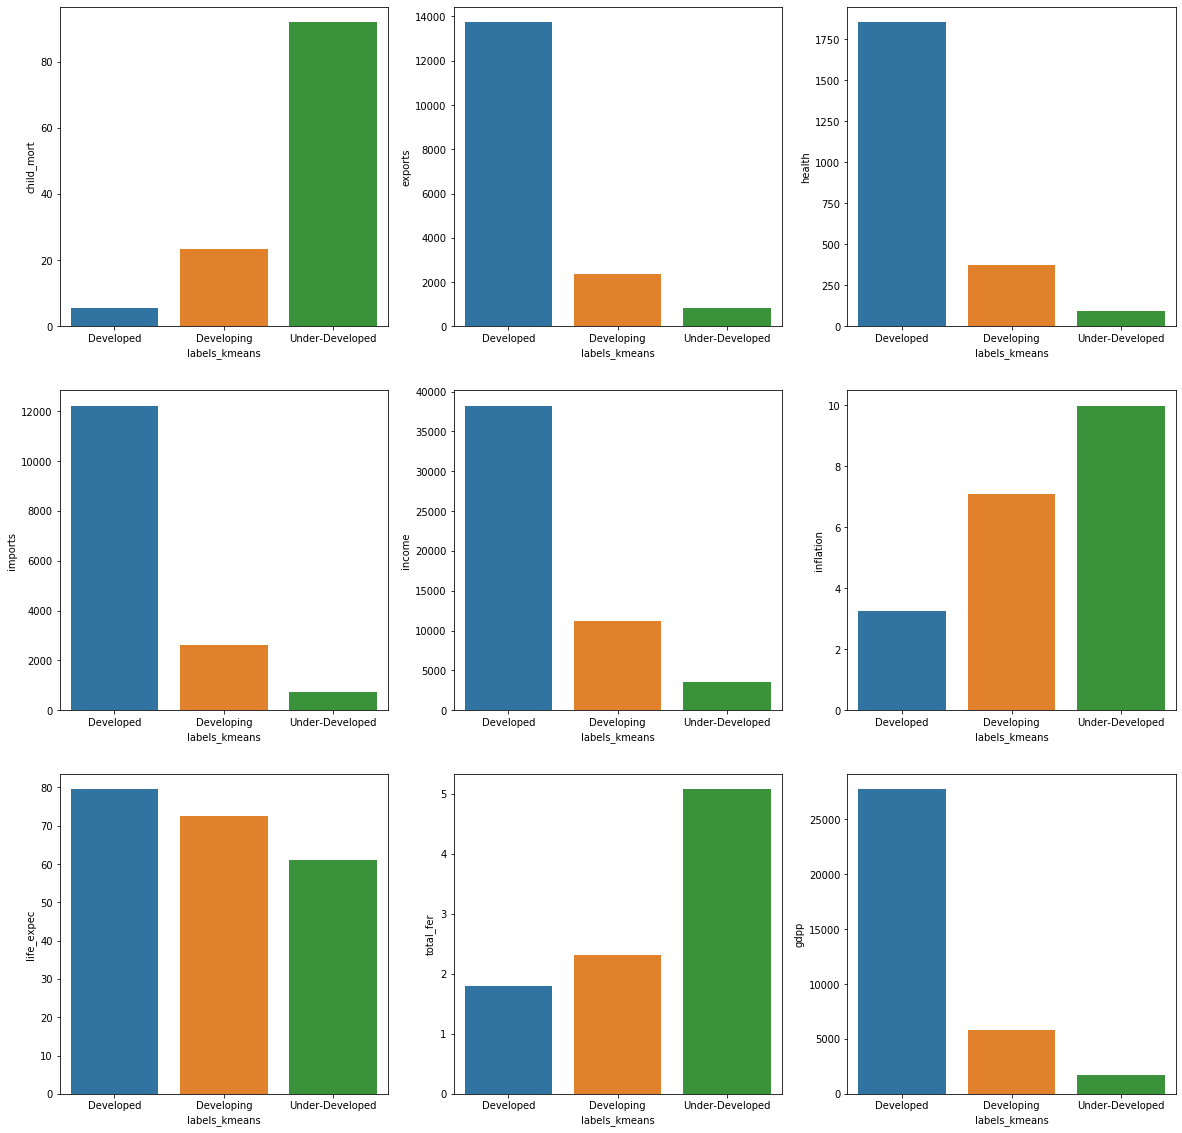

In [61]:
col_data_kmean = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

plt.figure(figsize=(20,20))
for i in enumerate(col_data_kmean):
    plt.subplot(3,3,i[0]+1)
    sns.barplot(kmean_df.index,kmean_df[i[1]])

## <font color=green> As per K-Means clustering: </font>
### <font color=green> Top 5 countries which are in dire need of help from NGO are: </font>
#### <font color=green>   1. Burundi: with 'child_mort' = 93.6, 'income' = 764, 'gdpp' = 331.62 </font>
#### <font color=green>   2. Liberia: with 'child_mort' = 89.3, 'income' = 742.24, 'gdpp' = 331.62 </font>
#### <font color=green>   3. Congo, Dem. Rep.: with 'child_mort' = 116, 'income' = 742.24, 'gdpp' = 334 </font>
#### <font color=green>   4. Niger: with 'child_mort' = 116, 'income' = 814, 'gdpp' = 348 </font>
#### <font color=green>   5. Sierra Leone: with 'child_mort' = 116, 'income' = 1220, 'gdpp' = 399 </font>

## <font color=orange> Clustering the data

In [62]:
df2 = help_NGO_df.copy()
df2.drop(['country','labels_kmeans'], axis=1, inplace=True)
df2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610.0,9.44,57.82,5.82,553.0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.30,1.65,4090.0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.50,2.89,4460.0
3,119.0,2199.19,100.6050,1514.370,5900.0,20.87,60.10,6.16,3530.0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.80,2.13,12200.0


## <font color=orange> Scaling for Hirarchical clustering

In [63]:
scale = StandardScaler()
df2 = scale.fit_transform(df2)
df2 = pd.DataFrame(df2)
df2.columns = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
df2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344012,-0.797324,-0.809703,-0.841745,-0.958490,0.393469,-1.694736,1.926928,-0.864346
1,-0.547543,-0.611671,-0.514964,-0.494027,-0.394106,-0.387374,0.679359,-0.865911,-0.542317
2,-0.272548,-0.515013,-0.621802,-0.611429,-0.192637,1.444058,0.705053,-0.035427,-0.508630
3,2.084186,-0.432134,-0.733158,-0.588655,-0.667480,2.196506,-1.401828,2.154642,-0.593302
4,-0.709457,0.138812,0.095134,0.545073,0.227937,-0.868499,0.743593,-0.544433,0.196065


## <font color=orange> Hopkins Score calculation for Hirarchical clustering

In [64]:
## Hopkins Score

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [65]:
hopkins(df2)

0.8649123805177344

### <font color=orange> Hirarchical Clustering

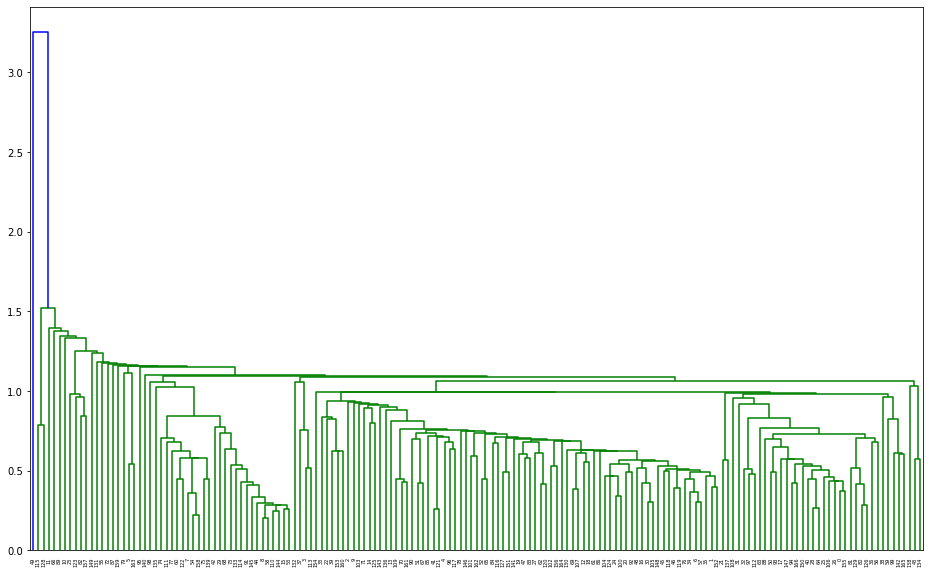

In [66]:
plt.figure(figsize=(16,10))
mergings = linkage(df2, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

#### <font color=green> From single linkage dendrogram we can see the cluster graph obtained.

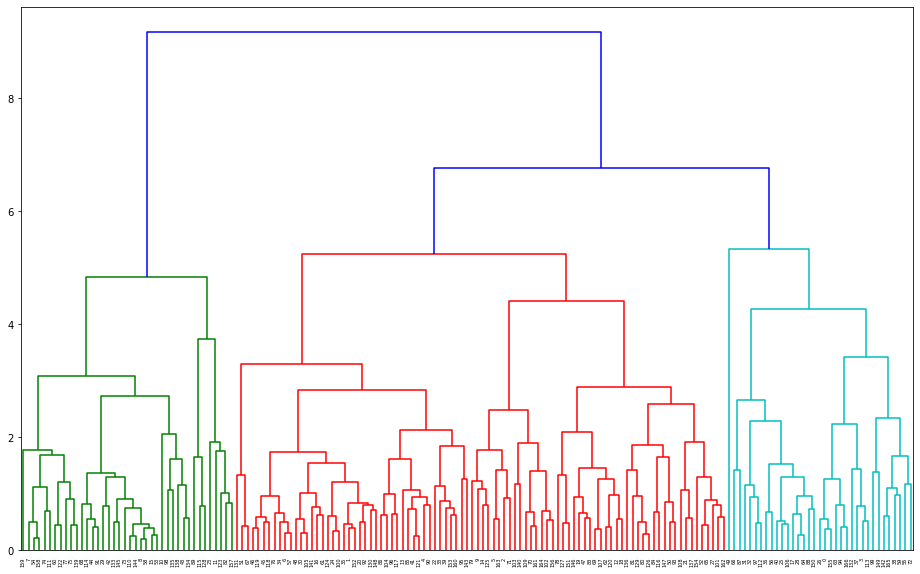

In [67]:
plt.figure(figsize=(16,10))
mergings = linkage(df2, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

#### <font color=green> From complete linkage dendrogram we can see the cluster graph obtained and its easier to pick the number of clusters we need for analysis and lets go with 3.

In [68]:
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0,
       0, 2, 1, 2, 1, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       2, 2, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       0, 2, 2, 2, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [69]:
help_NGO_df['labels_hirarchical'] = cluster_labels
help_NGO_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels_kmeans,labels_hirarchical
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,57.82,5.82,553.0,Under-Developed,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.30,1.65,4090.0,Developing,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.50,2.89,4460.0,Developing,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,20.87,60.10,6.16,3530.0,Under-Developed,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.80,2.13,12200.0,Developing,1


#### <font color=orange> Renaming the cluster labels

In [70]:
help_NGO_df.labels_hirarchical.replace([0,1,2], ['Under-Developed','Developing','Developed'], inplace=True)
help_NGO_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels_kmeans,labels_hirarchical
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,57.82,5.82,553.0,Under-Developed,Under-Developed
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.30,1.65,4090.0,Developing,Developing
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.50,2.89,4460.0,Developing,Developing
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,20.87,60.10,6.16,3530.0,Under-Developed,Under-Developed
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.80,2.13,12200.0,Developing,Developing


In [71]:
help_NGO_df.labels_hirarchical.value_counts()

Developing         92
Developed          40
Under-Developed    35
Name: labels_hirarchical, dtype: int64

#### <font color=green> We can clearly see how the clusters points are poised which seems reasonable comparitively.

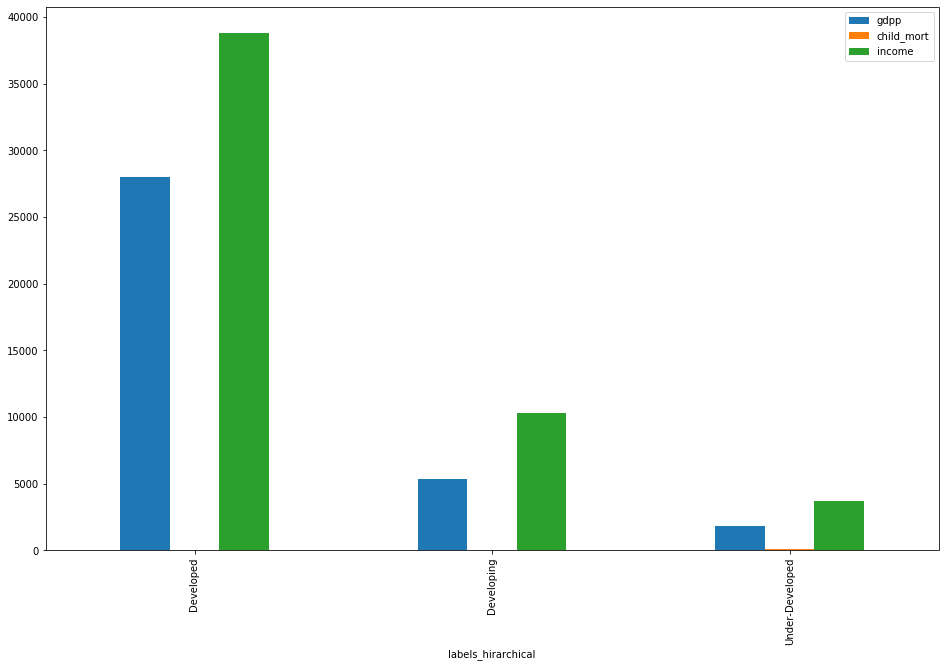

In [72]:
help_NGO_df[['gdpp', 'child_mort', 'income', 'labels_hirarchical']].groupby("labels_hirarchical").mean().plot(kind = 'bar', figsize=(16,10))
plt.show()

#### <font color=green> Here according to graph, we can see how developed, under-developed and developing countries are stacked against each other.

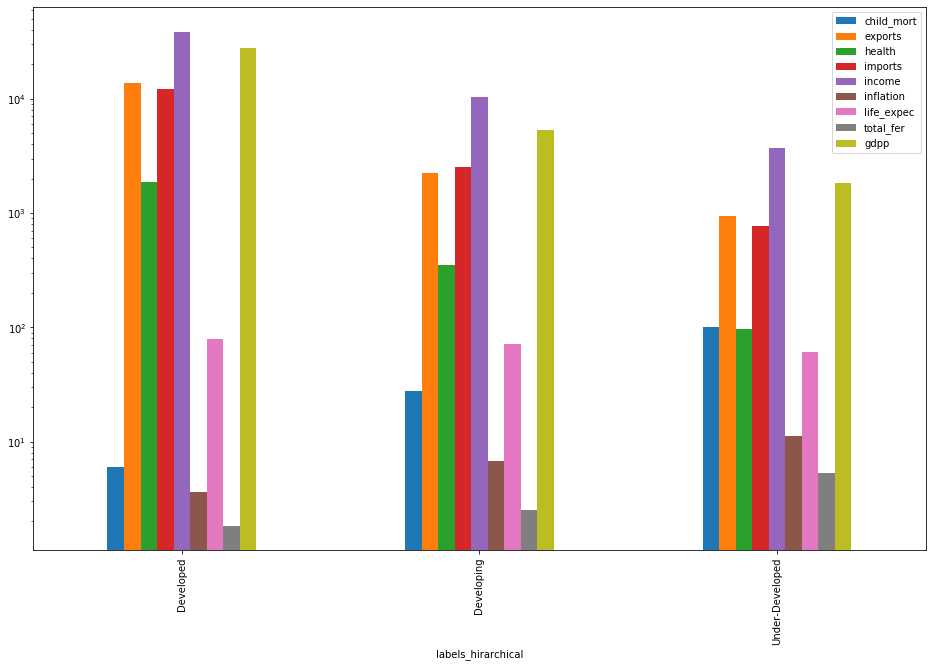

In [73]:
help_NGO_df[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec',  'total_fer', 'gdpp', 'labels_hirarchical']].groupby("labels_hirarchical").mean().plot(kind = 'bar', figsize=(16,10))
plt.yscale('log')
plt.show()

#### <font color=green> Stacking all variables against 3 clusters.

### <font color=orange> Sorting by columns 'gdpp', 'child_mort', 'income' to see which country needs help

In [74]:
help_NGO_df[help_NGO_df['labels_hirarchical']=='Under-Developed'].sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels_kmeans,labels_hirarchical
26,Burundi,93.6,22.243716,26.7960,104.90964,764.00,12.30,57.82,6.2600,331.62,Under-Developed,Under-Developed
88,Liberia,89.3,62.457000,38.5860,302.80200,742.24,5.47,60.80,5.0200,331.62,Under-Developed,Under-Developed
37,"Congo, Dem. Rep.",116.0,137.274000,26.4194,165.66400,742.24,20.80,57.82,6.5400,334.00,Under-Developed,Under-Developed
112,Niger,123.0,77.256000,17.9568,170.86800,814.00,2.55,58.80,6.5636,348.00,Under-Developed,Under-Developed
132,Sierra Leone,153.4,67.032000,52.2690,137.65500,1220.00,17.20,57.82,5.2000,399.00,Under-Developed,Under-Developed


### <font color=green> We can clearly see the top 5 under-developed countries which need aid due to low income, gdpp, health and high child mortality.

In [75]:
help_NGO_df[help_NGO_df['labels_hirarchical']=='Developing'].sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels_kmeans,labels_hirarchical
93,Madagascar,62.2,103.2500,17.009362,177.590,1390.0,8.79,60.8,4.60,413.0,Under-Developed,Developing
50,Eritrea,55.2,23.0878,17.009362,112.306,1420.0,11.60,61.7,4.61,482.0,Under-Developed,Developing
126,Rwanda,63.6,67.5600,59.115000,168.900,1350.0,2.61,64.6,4.51,563.0,Under-Developed,Developing
109,Nepal,47.0,56.7136,31.080000,215.488,1990.0,15.10,68.3,2.61,592.0,Developing,Developing
147,Tanzania,71.9,131.2740,42.190200,204.282,2090.0,9.25,59.3,5.43,702.0,Under-Developed,Developing


In [76]:
help_NGO_df[help_NGO_df['labels_hirarchical']=='Developed'].sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels_kmeans,labels_hirarchical
89,Libya,16.6,7937.6,469.48,5094.1,29600.0,14.200,76.1,2.41,12100.0,Developing,Developed
134,Slovak Republic,7.0,12665.8,1459.14,12914.8,25200.0,0.485,75.5,1.43,16600.0,Developed,Developed
128,Saudi Arabia,15.7,9572.8,827.97,6369.0,45400.0,17.200,75.1,2.96,19300.0,Developed,Developed
115,Oman,11.7,12680.1,534.61,7951.6,45300.0,15.600,76.1,2.90,19300.0,Developed,Developed
43,Czech Republic,3.4,13068.0,1560.24,12454.2,28300.0,-1.430,77.5,1.51,19800.0,Developed,Developed


### <font color=orange> Visualization for Hirarchical Clustering

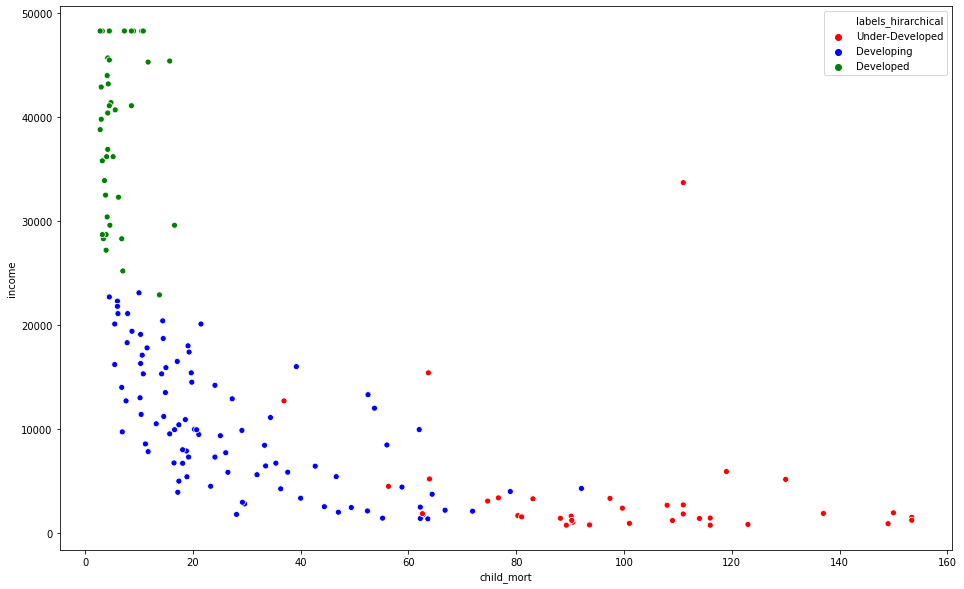

In [77]:
plt.figure(figsize=(16,10))
sns.scatterplot(x = "child_mort" , y = "income", hue = 'labels_hirarchical', data = help_NGO_df, palette=['red','blue','green'])
plt.show()

#### <font color=green> Here we can clearly see that how low income leads to lot of problems like health and child mortality.

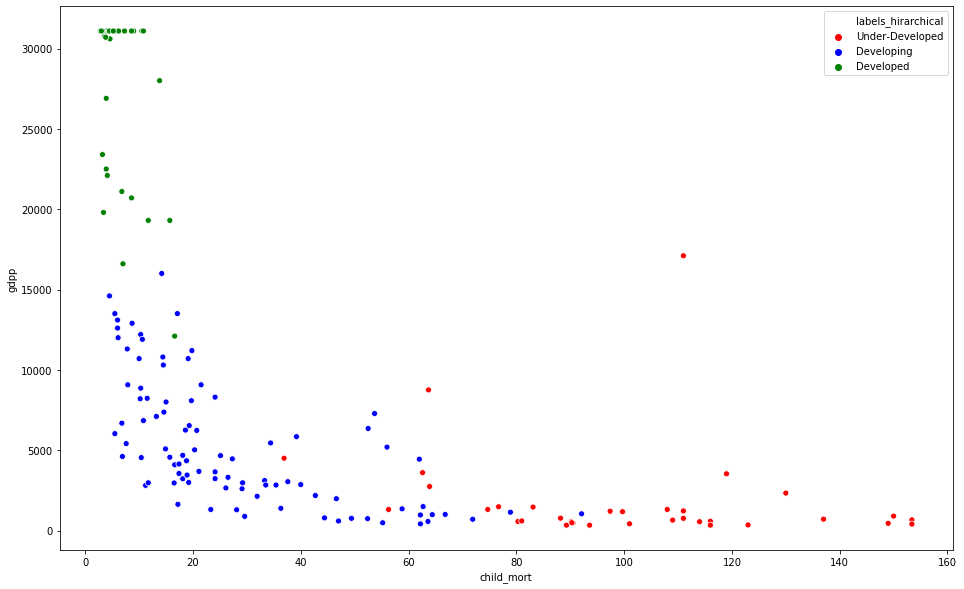

In [78]:
plt.figure(figsize=(16,10))
sns.scatterplot(x = "child_mort" , y = "gdpp", hue = 'labels_hirarchical', data = help_NGO_df, palette=['red','blue','green'])
plt.show()

#### <font color=green> Here we can clearly see that how low gdpp leads to lot of problems like health and child mortality.

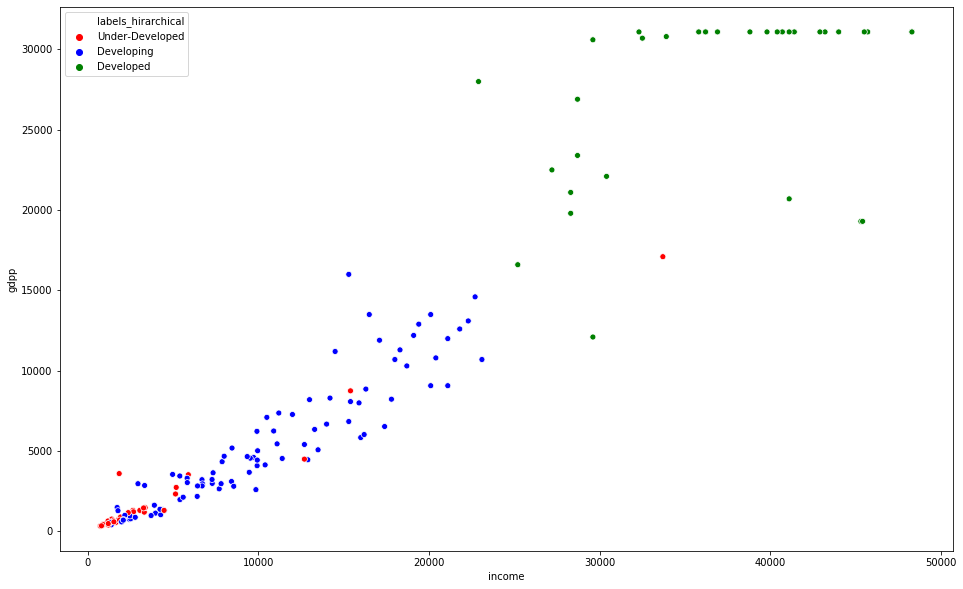

In [79]:
plt.figure(figsize=(16,10))
sns.scatterplot(x = "income" , y = "gdpp", hue = 'labels_hirarchical', data = help_NGO_df, palette=['red','blue','green'])
plt.show()

#### <font color=green> Here we can clearly see that how income and gdpp are linealy related to each other. Higher the income, higher is the GDP and vice-versa.

### <font color=orange> Calculating mean of the required columns for comparison

In [80]:
hierarchical_df = help_NGO_df.copy()
hierarchical_df = hierarchical_df.groupby('labels_hirarchical')['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp'].mean()
hierarchical_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
labels_hirarchical,,,,,,,,,
Developed,5.950000,13754.700000,1868.953000,12160.689000,38815.250000,3.591080,79.623500,1.833410,28028.750000
Developing,27.846739,2261.151153,353.469281,2514.399344,10273.152174,6.794024,71.223261,2.523804,5356.293478
Under-Developed,100.862857,934.649906,97.055677,769.039390,3737.385143,11.178143,60.614286,5.312491,1824.006857


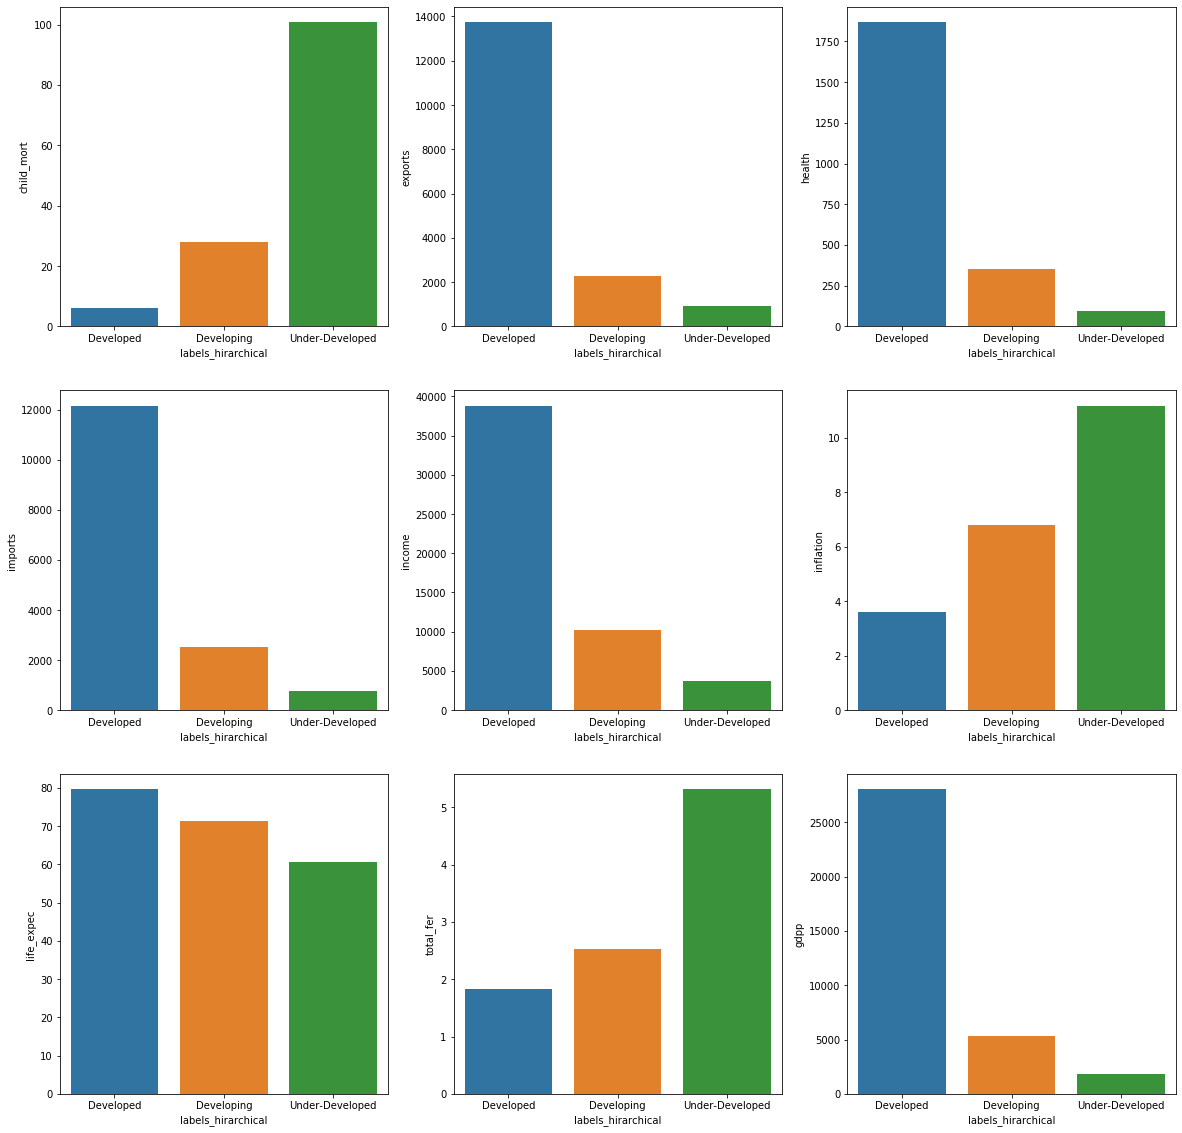

In [81]:
col_data_hierarchical = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

plt.figure(figsize=(20,20))
for i in enumerate(col_data_hierarchical):
    plt.subplot(3,3,i[0]+1)
    sns.barplot(hierarchical_df.index,hierarchical_df[i[1]])

## <font color=green> As per Hierarchical clustering: </font>
### <font color=green> Top 5 countries which are in dire need of help from NGO are: </font>
#### <font color=green>   1. Burundi: with 'child_mort' = 93.6, 'income' = 764, 'gdpp' = 331.62 </font>
#### <font color=green>   2. Liberia: with 'child_mort' = 89.3, 'income' = 742.24, 'gdpp' = 331.62 </font>
#### <font color=green>   3. Congo, Dem. Rep.: with 'child_mort' = 116, 'income' = 742.24, 'gdpp' = 334 </font>
#### <font color=green>   4. Niger: with 'child_mort' = 116, 'income' = 814, 'gdpp' = 348 </font>
#### <font color=green>   5. Sierra Leone: with 'child_mort' = 116, 'income' = 1220, 'gdpp' = 399 </font>

### <font color=burgandy> Both the clustering methods are showing the same 5 countries which are in need of help from NGO.</font>
### <font color=burgandy> The main driver variables being: </font>
### <font color=burgandy>    - Income</font>
### <font color=burgandy>    - Health</font>
### <font color=burgandy>    - Child mortality</font>
### <font color=burgandy>    - GDP.</font>
    
### <font color=burgandy> And the final list of countries requiring HELP's help: </font>
### <font color=burgandy> Burundi </font>
### <font color=burgandy> Liberia </font>
### <font color=burgandy> Congo, Dem. Rep. </font>
### <font color=burgandy> Niger </font>
### <font color=burgandy> Sierra Leone </font>

    